# 1. Loading and Viewing Dataset

In [58]:
import pandas as pd

pd.set_option('display.max_colwidth', -1)

train = pd.read_csv('./movie-review-sentiment-analysis-kernels-only/train.tsv', sep="\t")
test = pd.read_csv('./movie-review-sentiment-analysis-kernels-only/test.tsv' , sep="\t")

train.shape , test.shape

((156060, 4), (66292, 3))

In [59]:
train.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what is good for the goose,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is good for the goose,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for the goose,2


Each Sentence has been parsed into many phrases by the parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data. Let's look at sentence number two with it phrases.

In [60]:
train.loc[train['SentenceId'] == 2]

,PhraseId,SentenceId,Phrase,Sentiment
63,64,2,"This quiet , introspective and entertaining independent is worth seeking .",4
64,65,2,"This quiet , introspective and entertaining independent",3
65,66,2,This,2
66,67,2,"quiet , introspective and entertaining independent",4
67,68,2,"quiet , introspective and entertaining",3
68,69,2,quiet,2
69,70,2,", introspective and entertaining",3
70,71,2,introspective and entertaining,3
71,72,2,introspective and,3
72,73,2,introspective,2


Let's check Average count of phrases for each sentence

In [61]:
print('Average count of phrases per sentence in train is {0:.0f}.'.format(train.groupby('SentenceId')['Phrase'].count().mean()))
print('Average count of phrases per sentence in test is {0:.0f}.'.format(test.groupby('SentenceId')['Phrase'].count().mean()))
print('Number of phrases in train: {}. Number of sentences in train: {}.'.format(train.shape[0], len(train.SentenceId.unique())))
print('Number of phrases in test: {}. Number of sentences in test: {}.'.format(test.shape[0], len(test.SentenceId.unique())))

Average count of phrases per sentence in train is 18.
Average count of phrases per sentence in test is 20.
Number of phrases in train: 156060. Number of sentences in train: 8529.
Number of phrases in test: 66292. Number of sentences in test: 3310.


## Check if the data containes Null or NaNs

In [62]:
train.isna().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [63]:
train.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

No missing data in both train and test set

## Convert the sentiment score to its meaningful version to use it during the analysis

In [64]:
train['sentiment_label'] = ''
train.loc[train.Sentiment == 0, 'sentiment_label'] = 'Negative'
train.loc[train.Sentiment == 1, 'sentiment_label'] = 'Somewhat Negative'
train.loc[train.Sentiment == 2, 'sentiment_label'] = 'Neutral'
train.loc[train.Sentiment == 3, 'sentiment_label'] = 'Somewhat Positive'
train.loc[train.Sentiment == 4, 'sentiment_label'] = 'Positive'

train.head()

,PhraseId,SentenceId,Phrase,Sentiment,sentiment_label
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,Somewhat Negative
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,Neutral
2,3,1,A series,2,Neutral
3,4,1,A,2,Neutral
4,5,1,series,2,Neutral


## Sentiment labels distribution

[Text(0, 0, 'Neutral'),
 Text(0, 0, 'Somewhat Positive'),
 Text(0, 0, 'Somewhat Negative'),
 Text(0, 0, 'Positive'),
 Text(0, 0, 'Negative')]

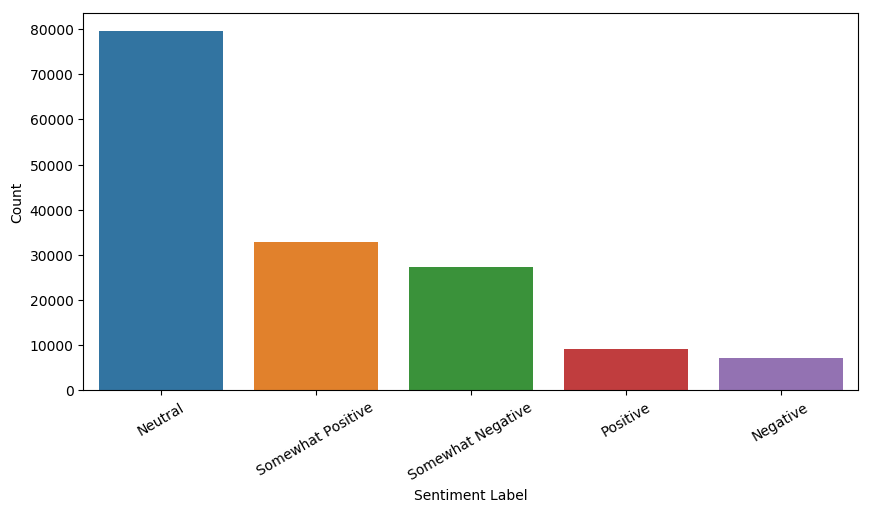

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(1, 1,dpi=100, figsize=(10,5))
sentiment_labels = train.sentiment_label.value_counts().index
sentiment_count = train.sentiment_label.value_counts()
sns.barplot(x=sentiment_labels,y=sentiment_count)
ax.set_ylabel('Count')    
ax.set_xlabel('Sentiment Label')
ax.set_xticklabels(sentiment_labels , rotation=30)

The most frequent label is Neutral which represent about 50% from the data.<br/>
The total positive reviews represent about 27%.<br/>
The total negative reviews represent about 23%.

## Data Cleaning and Transformation
- Data cleaning by removing the punctuation, digits and multiple spaces from review text.

In [66]:
#preparetext: remove punctuation from text, punctuation including '!"#$%&\'()*+,-./:;<=>?@[\]^`{|}~'
import re
import string

def prepare_text(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[%s]' % re.escape(string.digits), '', text)
    text = re.sub('[%s]' % re.escape(' +'), ' ', text)
    text = text.lower()
    text = text.strip()
    return text

In [67]:
train['cleaned_phrase'] = ''
train['cleaned_phrase'] = [prepare_text(phrase) for phrase in train.Phrase]
test['cleaned_phrase'] = ''
test['cleaned_phrase'] = [prepare_text(phrase) for phrase in test.Phrase]

train['phrase_length'] = [len(sent.split(' ')) for sent in train.cleaned_phrase]
test['phrase_length'] = [len(sent.split(' ')) for sent in test.cleaned_phrase]

train.head()

,PhraseId,SentenceId,Phrase,Sentiment,sentiment_label,cleaned_phrase,phrase_length
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,Somewhat Negative,a series of escapades demonstrating the adage that what is good for the goose is also good for the gander some of which occasionally amuses but none of which amounts to much of a story,36
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,Neutral,a series of escapades demonstrating the adage that what is good for the goose,14
2,3,1,A series,2,Neutral,a series,2
3,4,1,A,2,Neutral,a,1
4,5,1,series,2,Neutral,series,1


In [68]:
test.head()

,PhraseId,SentenceId,Phrase,cleaned_phrase,phrase_length
0,156061,8545,An intermittently pleasing but mostly routine effort .,an intermittently pleasing but mostly routine effort,7
1,156062,8545,An intermittently pleasing but mostly routine effort,an intermittently pleasing but mostly routine effort,7
2,156063,8545,An,an,1
3,156064,8545,intermittently pleasing but mostly routine effort,intermittently pleasing but mostly routine effort,6
4,156065,8545,intermittently pleasing but mostly routine,intermittently pleasing but mostly routine,5


## Generate WordClouds for Positive, Negative and Neutral Reviews.

In [69]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

Stopwords = list(ENGLISH_STOP_WORDS) + stopwords.words()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarthak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
from wordcloud import WordCloud

def wordcloud(sentiment):
    stopwordslist = Stopwords
    ## extend list of stopwords with the common words between the 3 classes which is not helpful to represent them
    stopwordslist.extend(['movie','movies','film','nt','rrb','lrb','make','work','like','story','time','little'])
    reviews = train.loc[train.Sentiment.isin(sentiment)]
    print("Word Cloud for Sentiment Labels: ", reviews.sentiment_label.unique())
    phrases = ' '.join(reviews.cleaned_phrase)
    words = " ".join([word for word in phrases.split()])
    wordcloud = WordCloud(stopwords=stopwordslist,width=3000,height=2500,background_color='white',).generate(words)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Word Cloud for Sentiment Labels:  ['Somewhat Positive' 'Positive']


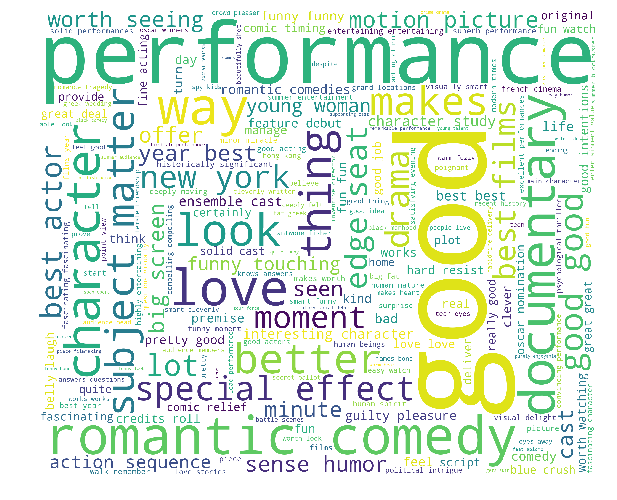

In [71]:
wordcloud([3,4])

Word Cloud for Sentiment Labels:  ['Somewhat Negative' 'Negative']


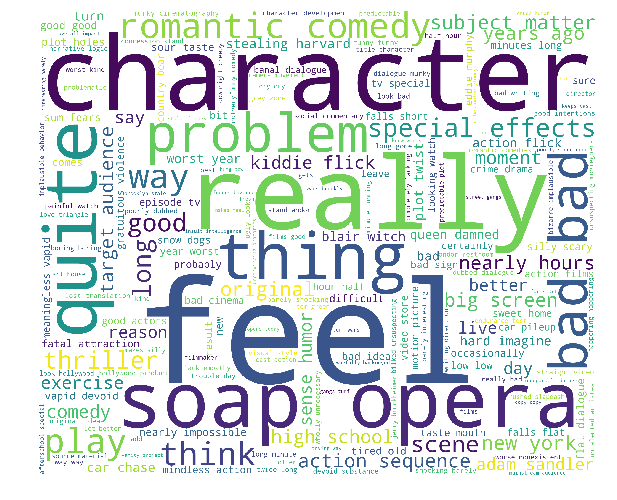

In [72]:
wordcloud([0,1])

Word Cloud for Sentiment Labels:  ['Neutral']


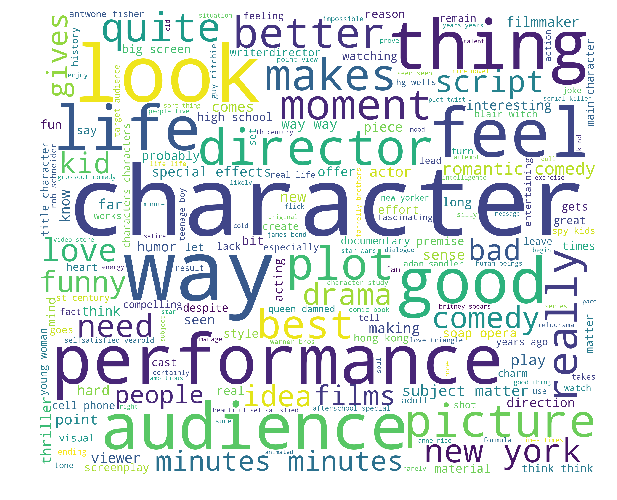

In [73]:
wordcloud([2])

## Dropping unecessory columns

In [74]:
df_train = train.drop(['PhraseId','SentenceId'],axis=1)
df_test = test.drop(['PhraseId','SentenceId'],axis=1)
df_train.head()

,Phrase,Sentiment,sentiment_label,cleaned_phrase,phrase_length
0,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,Somewhat Negative,a series of escapades demonstrating the adage that what is good for the goose is also good for the gander some of which occasionally amuses but none of which amounts to much of a story,36
1,A series of escapades demonstrating the adage that what is good for the goose,2,Neutral,a series of escapades demonstrating the adage that what is good for the goose,14
2,A series,2,Neutral,a series,2
3,A,2,Neutral,a,1
4,series,2,Neutral,series,1


## Extract Features from movie reviews text

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

train_phrase_length = sparse.csr_matrix(train.phrase_length)
test_phrase_length = sparse.csr_matrix(test.phrase_length)

tfidf_vectorizer = TfidfVectorizer(analyzer=u'word',stop_words=Stopwords,ngram_range=(1,3), max_df = 0.5, min_df = 5)
train_tf_feature_vector = tfidf_vectorizer.fit_transform(df_train.cleaned_phrase)
test_tf_feature_vector = tfidf_vectorizer.transform(df_test.cleaned_phrase)

tfidf_char_vectorizer = TfidfVectorizer(analyzer=u'char',stop_words=Stopwords,ngram_range=(2,6), max_df = 0.5, min_df = 5)
train_tf_char_feature_vector = tfidf_char_vectorizer.fit_transform(train.cleaned_phrase)
test_tf_char_feature_vector = tfidf_char_vectorizer.transform(test.cleaned_phrase)

In [85]:
from scipy import sparse

tf_train = sparse.hstack([train_tf_feature_vector,train_tf_char_feature_vector,train_phrase_length.T])
tf_test = sparse.hstack([test_tf_feature_vector,test_tf_char_feature_vector,test_phrase_length.T])

In [86]:
tf_train

<156060x337426 sparse matrix of type '<class 'numpy.float64'>'
	with 27323279 stored elements in COOrdinate format>